# Вариант 6

## ЧИСЛЕННОЕ РЕШЕНИЕ ЗАДАЧИ КОШИ
## Задачи № 7.1.6, 7.4.2, 7.7.2

## №7.1.6

### Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка
### y'(t) = f(t, y(t))
### y0 = y(t0)

### f(t, y(t)) = (y / (t + 1)) + e^t(t + 1)
### t0 = 0, T = 1, y0 = 1

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
t0 = 0
T = 1
y0 = 1
h = 0.1
t_val = np.arange(t0, T + h, h)

In [44]:
def f(t, y):
    return y / (t + 1) + (t + 1) * np.e**t

In [76]:
def eyler(f, y0, t_val, h):
    y = np.empty(len(t_val))
    y[0] = y0
    for i in range(1, len(t_val)):
        y[i] = y[i - 1] + h * f(t_val[i - 1], y[i - 1])
    return y

[1.         1.2        1.43065971 1.69644968 2.00242746 2.35431345
 2.75857587 3.22252587 3.75442417 4.36360066 5.06058845]


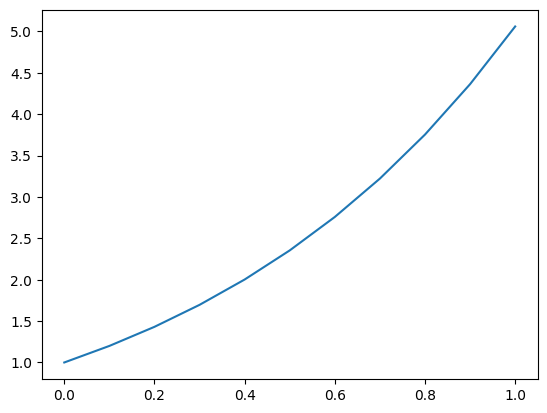

In [96]:
print(eyler(f, y0, t_val, h))
plt.plot(t_val, eyler(f, y0, t_val, h), label='Eyler method')

In [149]:
def rkfixed(f, y0, t_val, h):
    y = np.empty(len(t_val))
    y[0] = y0

    for i in range(1, len(t_val)):
        k1 = f(t_val[0] + (i - 1) * h, y[i - 1])
        k2 = f(t_val[0] + (i - 1) * h + h / 2, y[i - 1] + h / 2 * k1)
        k3 = f(t_val[0] + (i - 1) * h + h / 2, y[i - 1] + h / 2 * k2)
        k4 = f(t_val[0] + (i - 1) * h + h, y[i - 1] + h * k3)
        y[i] = y[i - 1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

[1.         1.21568767 1.46568265 1.75481549 2.08855333 2.47308039
 2.91538829 3.42337755 4.00597136 4.67324334 5.43656083]


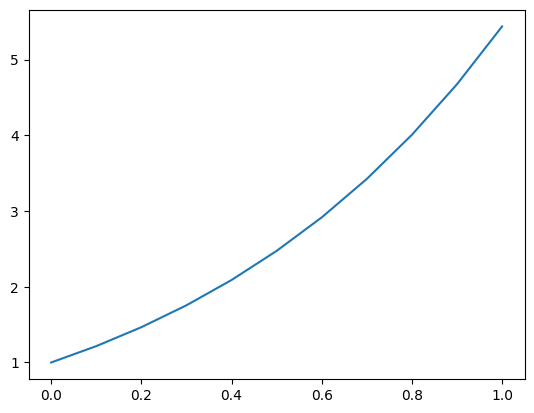

In [155]:
print(rkfixed(f, y0, t_val, h))
plt.plot(t_val, rkfixed(f, y0, t_val, h), label='Rynge-Kytta method')

In [175]:
def analytical_dec(t):
    return (t + 1) * np.e**t

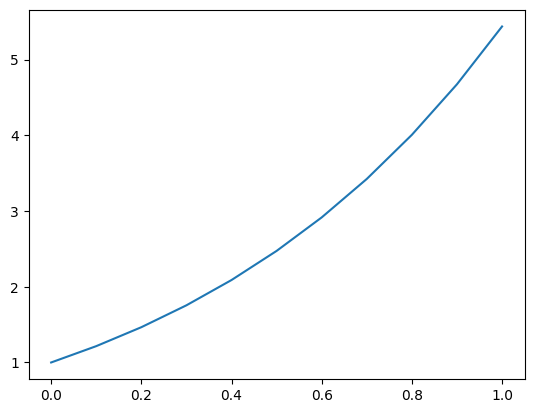

In [177]:
plt.plot(t_val, analytical_dec(t_val), label='Analytical')

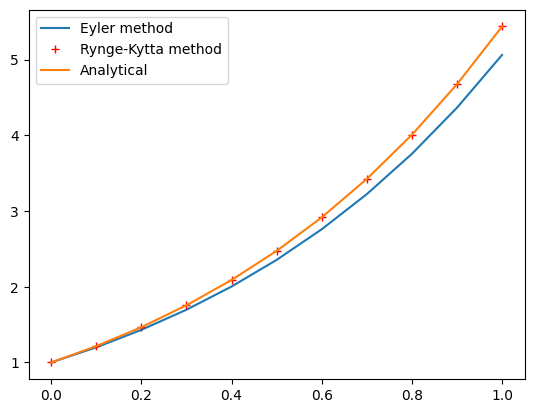

In [201]:
plt.plot(t_val, eyler(f, y0, t_val, h), label='Eyler method')
plt.plot(t_val, rkfixed(f, y0, t_val, h), 'r+', label='Rynge-Kytta method')
plt.plot(t_val, analytical_dec(t_val), label='Analytical')
plt.legend()
plt.show()

In [237]:
def error(x, y):
    return np.max(np.abs(x - y))


def runge_error(method, f, y0, t_val, h, p):
    return np.max(np.abs(method(f, y0, t_val, h) - method(f, y0, t_val, h / 2) / (2**p - 1)))

In [248]:
epsilon_eyler = error(eyler(f, y0, t_val, h), analytical_dec(t_val))
epsilon_runge = error(rkfixed(f, y0, t_val, h), analytical_dec(t_val))

In [250]:
print(f'Error of Euler method: {epsilon_eyler}')
print(f'Error of Runge-Kutta method: {epsilon_runge}')

Error of Euler method: 0.37597521081541885
Error of Runge-Kutta method: 2.8225130037640156e-06


In [254]:
runge_eyler = runge_error(eyler, f, y0, t_val, h, 1)
runge_runge = runge_error(rkfixed, f, y0, t_val, h, 4)

In [256]:
print(f'Runge - Error of Euler method: {runge_eyler}')
print(f'Runge - Error of Runge-Kutta method: {runge_runge}')

Runge - Error of Euler method: 2.257225474370998
Runge - Error of Runge-Kutta method: 5.271688714124955


In [305]:
def find_eyler(f, y0, t_val, eps, h, max_it = 1000):
    it = 0
    while it < max_it:
        y_e = eyler(f, y0, t_val, h)
        y_a = analytical_dec(t_val)
        epsilon = np.max(np.abs(y_a - y_e))
        if epsilon <= eps:
            return h
        h /= 2
        t_val = np.arange(t0, T + h, h)
        it += 1

h_optimal = find_eyler(f, y0, t_val, epsilon_runge, h)

print(f'h* = {h_optimal}')

h* = 3.814697265625e-07


## №7.4.2

### Решить приближенно задачу Коши для ОДУ 3 порядка на отрезке [A, B], используя метод Рунге-Кутты 4 с шагами h=0.1 и h=0.05 для систем ОДУ 1 порядка. Оценить погрешность по правилу Рунге. Построить график решения, найденного с шагом h=0.05.
### a0 * y''' + a1 * y'' + a2 * y' + a3 * y = f(t)
### y = b1, y' = b2, y'' = b3
### f(t) = e^-2t - 1.5t + 1
### A = 0 
### B = 1.5 
### b1 = 1 
### b2 = 2.0 
### b3 = 4 
### a0 = 1 
### a1 = -1.8 
### a2 = 0.36 
### a3 = 44.28

In [312]:
def f(t):
    return np.exp(-2*t) - 1.5*t + 1

In [316]:
A = 0
B = 1.5
b1 = 1
b2 = 2.0
b3 = 4
a0 = 1
a1 = -1.8
a2 = 0.36
a3 = 44.28

h1 = 0.05
t_val1 = np.arange(A, B + h, h)
t_val2 = np.arange(A, B + h1, h1)

In [320]:
def s(t, y):
    y1, y2, y3 = y
    dy1 = y2
    dy2 = y3
    dy3 = (f(t) - a1 * y3 - a2 * y2 - a3 * y1) / a0
    return np.array([dy1, dy2, dy3])

In [361]:
def rkfixed_s(s, y0, t, h):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * s(t[i - 1], y[i - 1])
        k2 = h * s(t[i - 1] + h/2, y[i - 1] + k1 / 2)
        k3 = h * s(t[i - 1] + h/2, y[i - 1] + k2 / 2)
        k4 = h * s(t[i - 1] + h, y[i - 1] + k3)
        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

In [363]:
y0 = np.array([b1, b2, b3])
s1 = rkfixed_s(s, y0, t_val1, h)
s2 = rkfixed_s(s, y0, t_val2, h1)
s1,s2

(array([[  1.        ,   2.        ,   4.        ],
        [  1.21337565,   2.19282467,  -0.44031106],
        [  1.42069734,   1.84651472,  -6.83177179],
        [  1.55787252,   0.75455791, -15.35892532],
        [  1.53972148,  -1.29269781, -25.87450429],
        [  1.26158951,  -4.46677696, -37.73429467],
        [  0.60594037,  -8.84253485, -49.62024978],
        [ -0.54432184, -14.32239484, -59.37850617],
        [ -2.28421555, -20.54674169, -63.91238471],
        [ -4.65570458, -26.79857072, -59.18471463],
        [ -7.60746072, -31.91659554, -40.39672482],
        [-10.94721923, -34.23821215,  -2.41904469],
        [-14.29110171, -31.60133372,  59.45034995],
        [-17.01753907, -21.44098227, 148.34154728],
        [-18.23726519,  -1.02090916, 264.25739364],
        [-16.79490857,  32.15993824, 402.14547384]]),
 array([[ 1.00000000e+00,  2.00000000e+00,  4.00000000e+00],
        [ 1.10421305e+00,  2.15184383e+00,  2.00353130e+00],
        [ 1.21334155e+00,  2.19289944e+00, -

In [420]:
p = 4
err = np.max(np.abs(s2[::, 0][::2] - s1[::, 0]) / (2**p - 1))
print(f'runge error: {err}')

runge error: 0.0007120640377867933


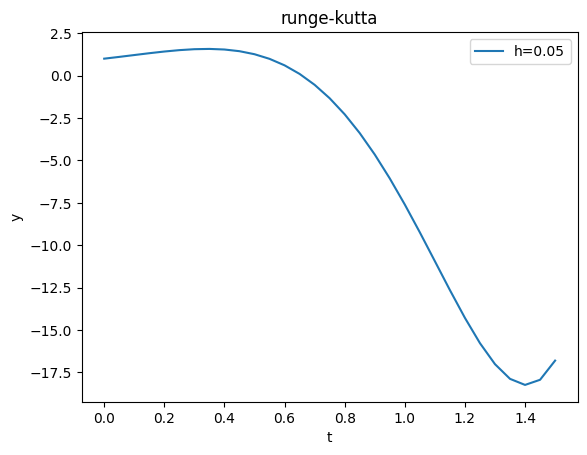

In [439]:
plt.plot(t_val2, y1_h2, label='h=0.05')
plt.xlabel('t')
plt.ylabel('y')
plt.title('runge-kutta')
plt.legend()
plt.show()